<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Classification_using_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
df = pd.read_csv('customer_churn_dataset.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [9]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B':1, 'Kartu C':2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [10]:
#atribut predictor/feature
X = df.iloc[:,:-1].values
#atribut target/label
Y = df.iloc[:,-1].values

In [12]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.fit_transform(X)

#X yang sudah dinormalisasi
print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 13) (8000,)
Test set: (2000, 13) (2000,)


In [14]:
K = 7
# Train Model
model_knn = KNeighborsClassifier(n_neighbors = K)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [15]:
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [16]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.93475
Test set Accuracy:  0.9185


In [17]:
#Terdapat 13 feature
product = int(input('Input Product :'))
reload_1 = float(input('Input Reload 1 :'))
reload_2 = float(input('Input Reload 2 :'))
video = float(input('Input Video :'))
music = float(input('Input Music :'))
games = float(input('Input Game : '))
chat_1 = float(input('Input Chat 1 :'))
chat_2 = float(input('Input Chat 2 :'))
socmed_1 = float(input('Input Socmed 1 :'))
socmed_2 = float(input('Input Socmed 2 :'))
internet = float(input('Input Internet :'))
days_active = float(input('Input Days Active :'))
tenure = float(input('Input Tenure :'))

new_data = [[product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure]]

# prediksi data baru
hasil_prediksi = model_knn.predict(new_data)

# cetak hasil prediksi
if hasil_prediksi == 0:
    print('\n Customer diprediksi tidak berhenti berlangganan (tetap aktif)')
else:
    print('\n Customer diprediksi berhenti berlangganan')

Input Product :1
Input Reload 1 :2
Input Reload 2 :3
Input Video :4
Input Music :5
Input Game : 6
Input Chat 1 :7
Input Chat 2 :8
Input Socmed 1 :9
Input Socmed 2 :10
Input Internet :11
Input Days Active :12
Input Tenure :13

 Customer diprediksi tidak berhenti berlangganan (tetap aktif)


In [18]:
Ks = 11
accuracies = []
precisions = []
recalls = []
# loops dari k=1 sampai dengan k=10
for k in range(1, Ks):
  knn = KNeighborsClassifier(n_neighbors=k)

  #training model
  knn.fit(X_train, y_train)

  #membuat prediksi dari testing data
  y_hat = knn.predict(X_test)

  #menyimpan hasil pengujain
  accuracies.append(metrics.accuracy_score(y_test, y_hat))
  precisions.append(metrics.precision_score(y_test, y_hat))
  recalls.append(metrics.recall_score(y_test, y_hat))

  # cetak hasil pengujian
  print('k =',k)
  print('Accuracy:', metrics.accuracy_score(y_test, y_hat))
  print('Precision:', metrics.precision_score(y_test, y_hat))
  print('Recall:', metrics.recall_score(y_test, y_hat), '\n')




k = 1
Accuracy: 0.914
Precision: 0.7876543209876543
Recall: 0.7876543209876543 

k = 2
Accuracy: 0.9225
Precision: 0.890625
Recall: 0.7037037037037037 

k = 3
Accuracy: 0.926
Precision: 0.8372703412073491
Recall: 0.7876543209876543 

k = 4
Accuracy: 0.9265
Precision: 0.8862275449101796
Recall: 0.7308641975308642 

k = 5
Accuracy: 0.922
Precision: 0.8467966573816156
Recall: 0.7506172839506173 

k = 6
Accuracy: 0.922
Precision: 0.8738738738738738
Recall: 0.7185185185185186 

k = 7
Accuracy: 0.9185
Precision: 0.8497109826589595
Recall: 0.725925925925926 

k = 8
Accuracy: 0.9185
Precision: 0.8711656441717791
Recall: 0.7012345679012346 

k = 9
Accuracy: 0.9145
Precision: 0.8421052631578947
Recall: 0.7111111111111111 

k = 10
Accuracy: 0.9115
Precision: 0.8607594936708861
Recall: 0.671604938271605 



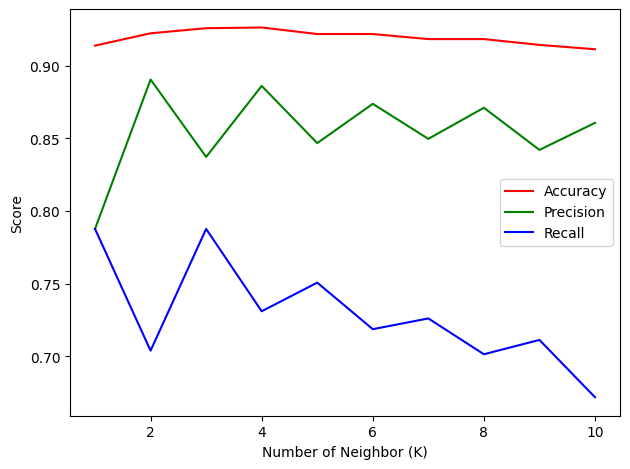

In [19]:
# line chart
plt.plot(range(1,Ks), accuracies, 'r')
plt.plot(range(1,Ks), precisions, 'g')
plt.plot(range(1,Ks), recalls, 'b')
plt.legend(('Accuracy', 'Precision', 'Recall'))
plt.xlabel('Number of Neighbor (K)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [21]:
max_accuracy = max(accuracies) #Assign the maximum value from accuracies list to max_accuracy
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi terbaik adalah ", max_accuracy, "dengan nilai k=", accuracies.index(max_accuracy)+1)
print("Presisi terbaik adalah ", max_precision, "dengan nilai k=", precisions.index(max_precision)+1)
print("Recall terbaik adalah ", max_recall, "dengan nilai k=", recalls.index(max_recall)+1)

Akurasi terbaik adalah  0.9265 dengan nilai k= 4
Presisi terbaik adalah  0.890625 dengan nilai k= 2
Recall terbaik adalah  0.7876543209876543 dengan nilai k= 1
